# AULA NUMERO 1 - Analise com Pandas

# ** PALAVRA CHAVE: PANDAS

In [57]:
import pandas as pd

In [58]:
link_projeto = ("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [59]:
df = pd.read_csv(link_projeto)

In [60]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [62]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [63]:
df.shape

(133349, 11)

In [64]:
linhas, colunas = df.shape

print(f"A base tem dados em {linhas} Linhas e {colunas} Colunas")

A base tem dados em 133349 Linhas e 11 Colunas


In [65]:
colunas_traduzidas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'porte_empresa'
}


df.rename(columns= colunas_traduzidas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'porte_empresa'],
      dtype='object')

In [66]:
senioridade = {
'SE': "Senior",
'MI': "Pleno",
'EN': "Junior",
'EX': "Executivo"
}

df['senioridade']= df['senioridade'].replace(senioridade)
df['senioridade'].value_counts() #caucula a frequencia de cada nivel de experiencia


senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [67]:
df['cargo'].value_counts()

cargo
Data Scientist                     17314
Software Engineer                  15007
Data Engineer                      14868
Data Analyst                       12381
Engineer                            9456
                                   ...  
Quantitative Research Analyst          1
Data Science Tech Lead                 1
Staff Machine Learning Engineer        1
Principal Data Architect               1
Cloud Data Architect                   1
Name: count, Length: 390, dtype: int64

In [68]:
contrato = {
'FT': "Integral",
'PT': "Parcial",
'FL': "Freelancer",
'CT': "Contrato"
}

df['contrato']= df['contrato'].replace(contrato)

df['contrato'].value_counts()

contrato
Integral      132563
Contrato         394
Parcial          376
Freelancer        16
Name: count, dtype: int64

In [69]:
remoto = {
0: "Presencial",
100: "Remto",
50: "Hibrido"
}

df['remoto']= df['remoto'].replace(remoto)
df['remoto'].value_counts()

remoto
Presencial    105312
Remto          27718
Hibrido          319
Name: count, dtype: int64

In [70]:
empresa = {
'S': "Pequena",
'M': "Media",
'L': "Grande"
}

df['porte_empresa']= df['porte_empresa'].replace(empresa)

df['porte_empresa'].value_counts()

porte_empresa
Media      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [71]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [72]:
df.describe(include = "object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,porte_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


## AULA NUMERO 2 - Preparação e limpeza

# ** PALAVRA CHAVE: PRINT **

In [73]:
df.isnull().sum()

ano              10
senioridade       0
contrato          0
cargo             0
salario           0
moeda             0
usd               0
residencia        0
remoto            0
empresa           0
porte_empresa     0
dtype: int64

In [74]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [75]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [76]:
import numpy as np

In [77]:
df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Diana","Nelio"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
    })

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Diana,NaN,36333.33,5000.0
4,Nelio,100000.0,100000.00,100000.0


In [78]:
df_temperatura = pd.DataFrame({
    'dia_semana': ["segunda", "terça", "quarta", "quinta","sexta"],
    'temperatura': [30, np.nan, np.nan,28, 27]
    })

df_temperatura['preenchido_ffill'] = df_temperatura['temperatura'].ffill()



df_temperatura

,dia_semana,temperatura,preenchido_ffill
0,segunda,30.0,30.0
1,terça,NaN,30.0
2,quarta,NaN,30.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0


In [79]:
df_temperatura = pd.DataFrame({
    'dia_semana': ["segunda", "terça", "quarta", "quinta","sexta"],
    'temperatura': [30, np.nan, np.nan,28, 27]
    })

df_temperatura['preenchido+bfill'] = df_temperatura['temperatura'].bfill()



df_temperatura

,dia_semana,temperatura,preenchido+bfill
0,segunda,30.0,30.0
1,terça,NaN,28.0
2,quarta,NaN,28.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0


In [80]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno","Nelio"],
    'cidade': ["Roraima", np.nan, "Pernanbuco"]
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna("Não Informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,Roraima,Roraima
1,Bruno,NaN,Não Informado
2,Nelio,Pernanbuco,Pernanbuco


In [81]:
dflimpo = df.dropna()

In [82]:
dflimpo.isnull().sum()

ano              0
senioridade      0
contrato         0
cargo            0
salario          0
moeda            0
usd              0
residencia       0
remoto           0
empresa          0
porte_empresa    0
dtype: int64

In [89]:
dflimpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [94]:
dflimpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ano            133339 non-null  int64 
 1   senioridade    133339 non-null  object
 2   contrato       133339 non-null  object
 3   cargo          133339 non-null  object
 4   salario        133339 non-null  int64 
 5   moeda          133339 non-null  object
 6   usd            133339 non-null  int64 
 7   residencia     133339 non-null  object
 8   remoto         133339 non-null  object
 9   empresa        133339 non-null  object
 10  porte_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [93]:
dflimpo = dflimpo.assign(ano = dflimpo['ano'].astype('int64'))

## AULA 3 - PLOTAGEM DE DADOS

In [95]:
dflimpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


<Axes: title={'center': 'Vagas por Senioridade'}, xlabel='senioridade'>

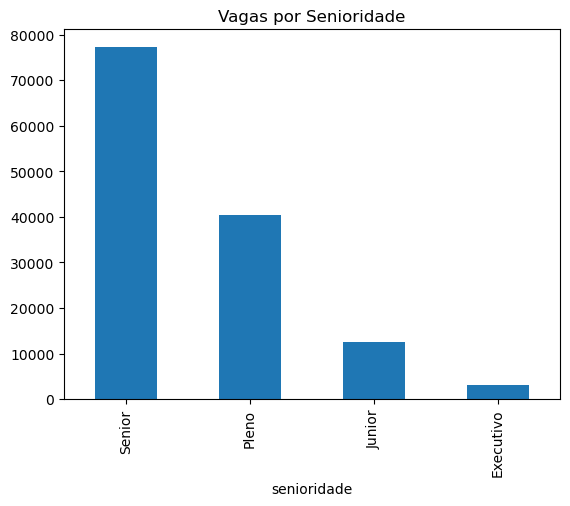

In [99]:
dflimpo['senioridade'].value_counts().plot(kind='bar', title='Vagas por Senioridade')

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='senioridade', ylabel='usd'>

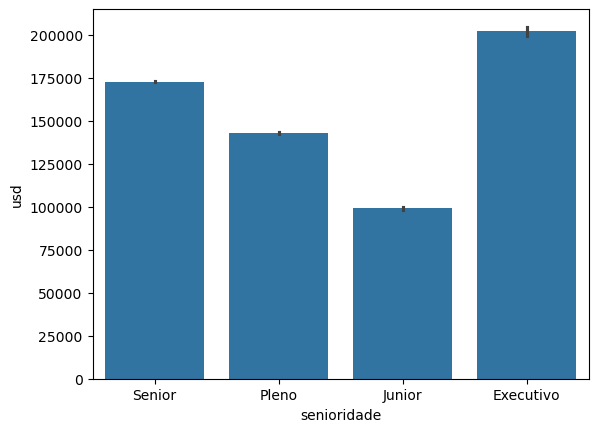

In [ ]:
sns.barplot(data= dflimpo, 
            x='senioridade',
            y= 'usd',
            )

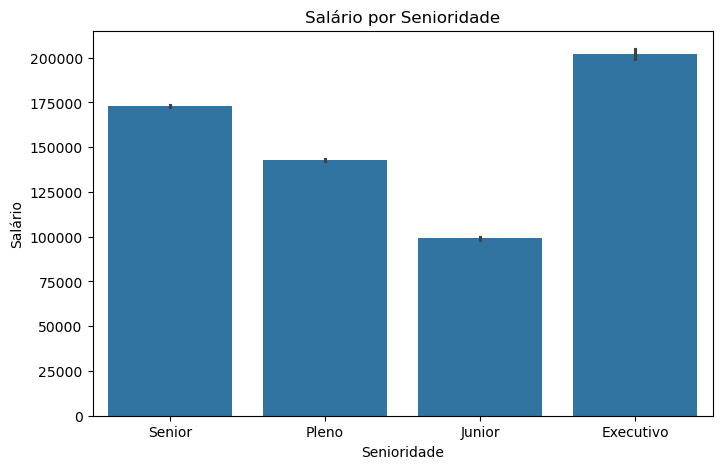

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data= dflimpo, 
            x='senioridade',
            y= 'usd',
            )
plt.title('Salário por Senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário")
plt.show()

In [107]:
ordem = dflimpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

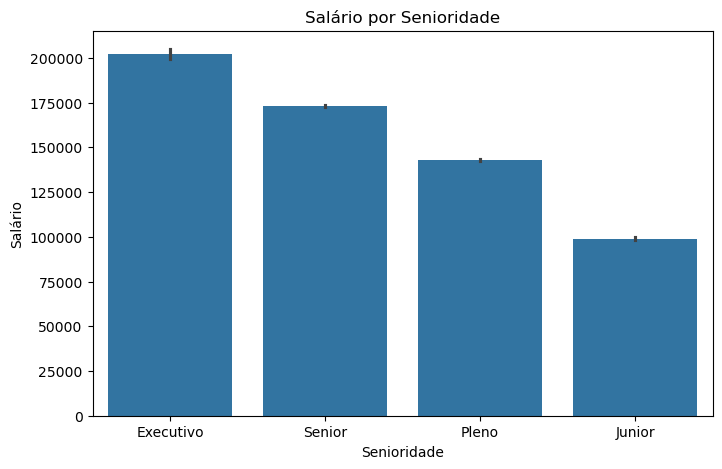

In [109]:
plt.figure(figsize=(8,5))
sns.barplot(data= dflimpo, 
            x='senioridade',
            y= 'usd',
            order = ordem
            )
plt.title('Salário por Senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário")
plt.show()